In [23]:
print("asd")

asd


In [24]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-de-en")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-de-en")

In [25]:
# Prepare your input text in German
input_text = "Der kostenlos angebotene Dienst von Google übersetzt Wörter, Phrasen und Webseiten sofort zwischen dem Englischen und über 100 anderen Sprachen"

# Prepend the task-specific prefix
prefix = ""
prefixed_text = prefix + input_text
print(prefixed_text)

# Tokenize the input text using the T5 tokenizer
input_ids = tokenizer.encode(prefixed_text, return_tensors="pt")

# Generate the translation using the T5 model
translation = model.generate(input_ids, max_length=1000)  # Adjust the max_length as needed

# Decode the generated translation back into text
translated_text = tokenizer.decode(translation[0], skip_special_tokens=True)

print(translated_text)

Der kostenlos angebotene Dienst von Google übersetzt Wörter, Phrasen und Webseiten sofort zwischen dem Englischen und über 100 anderen Sprachen
Google's free-of-charge service translates words, phrases and websites instantly between English and over 100 other languages


In [26]:
import joblib

In [27]:
joblib.dump(tokenizer, "translator-tokenizer.pkl")

['translator-tokenizer.pkl']

In [28]:
joblib.dump(model, "translator-model.pkl")

['translator-model.pkl']

In [29]:
translator_tokenizer = joblib.load("translator-tokenizer.pkl")
translator_model = joblib.load("translator-model.pkl")

In [30]:
import pandas as pd

In [31]:
data = pd.read_csv('kundenanfragen-daten.txt', delimiter=',', names=['text-de', 'class'])
data

,text-de,class
0,Ich hätte gerne mehr Informationen zu Ihrem Sm...,Produktanfragen
1,"Guten Tag, ich interessiere mich für Ihre Möbe...",Produktanfragen
2,"Sehr geehrtes Team, gibt es eine Garantie für ...",Produktanfragen
3,Können Sie mir Kundenbewertungen für das Produ...,Produktanfragen
4,"Hallo, wie funktioniert das Rückgaberecht für ...",Produktanfragen
...,...,...
894,"Bieten Sie hier Beratungsdienste an?""",Allgemeine Anfrage
895,"Könnten Sie mir darüber Auskunft geben?""",Allgemeine Anfrage
896,"Bieten Sie hier individuelle Anpassungen an?""",Allgemeine Anfrage
897,"Könnten Sie mir darüber Auskunft geben?""",Allgemeine Anfrage


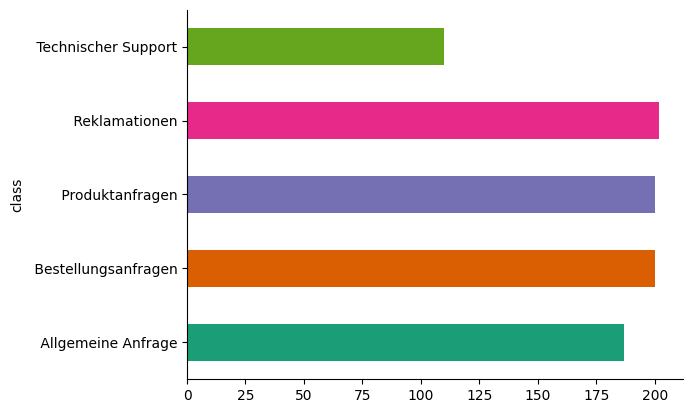

In [32]:
# @title class

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [33]:
def translate_german_to_english(text):
  # Tokenize the input text using the T5 tokenizer
  input_ids = tokenizer.encode(text, return_tensors="pt")

  # Generate the translation using the T5 model
  translation = model.generate(input_ids, max_length=1000)  # Adjust the max_length as needed

  # Decode the generated translation back into text
  translated_text = tokenizer.decode(translation[0], skip_special_tokens=True)
  return translated_text

In [34]:
data['text-en'] = data['text-de'].apply(translate_german_to_english)
data

,text-de,class,text-en
0,Ich hätte gerne mehr Informationen zu Ihrem Sm...,Produktanfragen,I would like more information about your smart...
1,"Guten Tag, ich interessiere mich für Ihre Möbe...",Produktanfragen,"Hello, I'm interested in your pieces of furnit..."
2,"Sehr geehrtes Team, gibt es eine Garantie für ...",Produktanfragen,"Dear team, is there a guarantee for the electr..."
3,Können Sie mir Kundenbewertungen für das Produ...,Produktanfragen,Can you provide me with customer reviews for t...
4,"Hallo, wie funktioniert das Rückgaberecht für ...",Produktanfragen,"Hello, how does the right of return for the pr..."
...,...,...,...
894,"Bieten Sie hier Beratungsdienste an?""",Allgemeine Anfrage,"Do you offer advisory services here?"""
895,"Könnten Sie mir darüber Auskunft geben?""",Allgemeine Anfrage,"Could you tell me about it?"""
896,"Bieten Sie hier individuelle Anpassungen an?""",Allgemeine Anfrage,"Do you offer individual adjustments here?"""
897,"Könnten Sie mir darüber Auskunft geben?""",Allgemeine Anfrage,"Could you tell me about it?"""


In [35]:
data['class'].value_counts()

class
Reklamationen          202
Produktanfragen        200
Bestellungsanfragen    200
Allgemeine Anfrage     187
Technischer Support    110
Name: count, dtype: int64

In [36]:
data['class-formatted'] = data['class'].apply(lambda x: x.strip().replace(' ', '_'))
data

,text-de,class,text-en,class-formatted
0,Ich hätte gerne mehr Informationen zu Ihrem Sm...,Produktanfragen,I would like more information about your smart...,Produktanfragen
1,"Guten Tag, ich interessiere mich für Ihre Möbe...",Produktanfragen,"Hello, I'm interested in your pieces of furnit...",Produktanfragen
2,"Sehr geehrtes Team, gibt es eine Garantie für ...",Produktanfragen,"Dear team, is there a guarantee for the electr...",Produktanfragen
3,Können Sie mir Kundenbewertungen für das Produ...,Produktanfragen,Can you provide me with customer reviews for t...,Produktanfragen
4,"Hallo, wie funktioniert das Rückgaberecht für ...",Produktanfragen,"Hello, how does the right of return for the pr...",Produktanfragen
...,...,...,...,...
894,"Bieten Sie hier Beratungsdienste an?""",Allgemeine Anfrage,"Do you offer advisory services here?""",Allgemeine_Anfrage
895,"Könnten Sie mir darüber Auskunft geben?""",Allgemeine Anfrage,"Could you tell me about it?""",Allgemeine_Anfrage
896,"Bieten Sie hier individuelle Anpassungen an?""",Allgemeine Anfrage,"Do you offer individual adjustments here?""",Allgemeine_Anfrage
897,"Könnten Sie mir darüber Auskunft geben?""",Allgemeine Anfrage,"Could you tell me about it?""",Allgemeine_Anfrage


In [37]:
data['class-formatted'].value_counts()

class-formatted
Reklamationen          202
Produktanfragen        200
Bestellungsanfragen    200
Allgemeine_Anfrage     187
Technischer_Support    110
Name: count, dtype: int64

In [38]:
data.to_csv('kundenanfragen-daten-en.txt', index=False)

In [39]:
data1 = pd.read_csv("kundenanfragen-daten-en.txt")
data1

,text-de,class,text-en,class-formatted
0,Ich hätte gerne mehr Informationen zu Ihrem Sm...,Produktanfragen,I would like more information about your smart...,Produktanfragen
1,"Guten Tag, ich interessiere mich für Ihre Möbe...",Produktanfragen,"Hello, I'm interested in your pieces of furnit...",Produktanfragen
2,"Sehr geehrtes Team, gibt es eine Garantie für ...",Produktanfragen,"Dear team, is there a guarantee for the electr...",Produktanfragen
3,Können Sie mir Kundenbewertungen für das Produ...,Produktanfragen,Can you provide me with customer reviews for t...,Produktanfragen
4,"Hallo, wie funktioniert das Rückgaberecht für ...",Produktanfragen,"Hello, how does the right of return for the pr...",Produktanfragen
...,...,...,...,...
894,"Bieten Sie hier Beratungsdienste an?""",Allgemeine Anfrage,"Do you offer advisory services here?""",Allgemeine_Anfrage
895,"Könnten Sie mir darüber Auskunft geben?""",Allgemeine Anfrage,"Could you tell me about it?""",Allgemeine_Anfrage
896,"Bieten Sie hier individuelle Anpassungen an?""",Allgemeine Anfrage,"Do you offer individual adjustments here?""",Allgemeine_Anfrage
897,"Könnten Sie mir darüber Auskunft geben?""",Allgemeine Anfrage,"Could you tell me about it?""",Allgemeine_Anfrage


In [40]:
data1['class-en'] = data1['class'].apply(translate_german_to_english)

In [41]:
data1

,text-de,class,text-en,class-formatted,class-en
0,Ich hätte gerne mehr Informationen zu Ihrem Sm...,Produktanfragen,I would like more information about your smart...,Produktanfragen,Product Enquiries
1,"Guten Tag, ich interessiere mich für Ihre Möbe...",Produktanfragen,"Hello, I'm interested in your pieces of furnit...",Produktanfragen,Product Enquiries
2,"Sehr geehrtes Team, gibt es eine Garantie für ...",Produktanfragen,"Dear team, is there a guarantee for the electr...",Produktanfragen,Product Enquiries
3,Können Sie mir Kundenbewertungen für das Produ...,Produktanfragen,Can you provide me with customer reviews for t...,Produktanfragen,Product Enquiries
4,"Hallo, wie funktioniert das Rückgaberecht für ...",Produktanfragen,"Hello, how does the right of return for the pr...",Produktanfragen,Product Enquiries
...,...,...,...,...,...
894,"Bieten Sie hier Beratungsdienste an?""",Allgemeine Anfrage,"Do you offer advisory services here?""",Allgemeine_Anfrage,General request
895,"Könnten Sie mir darüber Auskunft geben?""",Allgemeine Anfrage,"Could you tell me about it?""",Allgemeine_Anfrage,General request
896,"Bieten Sie hier individuelle Anpassungen an?""",Allgemeine Anfrage,"Do you offer individual adjustments here?""",Allgemeine_Anfrage,General request
897,"Könnten Sie mir darüber Auskunft geben?""",Allgemeine Anfrage,"Could you tell me about it?""",Allgemeine_Anfrage,General request


In [42]:
data1.to_csv('kundenanfragen-daten-en-1.txt', index=False)